In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import floor
from pathlib import Path
import json

__rows = 1
__cols = 1


def sb_init(rows, cols):
    plt.figure(figsize=[cols*5, rows*4])
    global __rows
    global __cols
    __rows = rows
    __cols = cols
    return plt.subplot(rows, cols, 1)


def sb(x, y):
    return plt.subplot(__rows, __cols, x + (y - 1) * __cols)


In [2]:
# Load data

p = Path('./')
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

for d in dirs:
    item = {}
    item.update( json.loads( (d / 'details.txt')   .read_text() ) )
    temp = (d / 'deposition.txt')   .read_text()
    temp = temp.replace("nan","0")
    item.update( json.loads( temp ) )
    data.append(item)

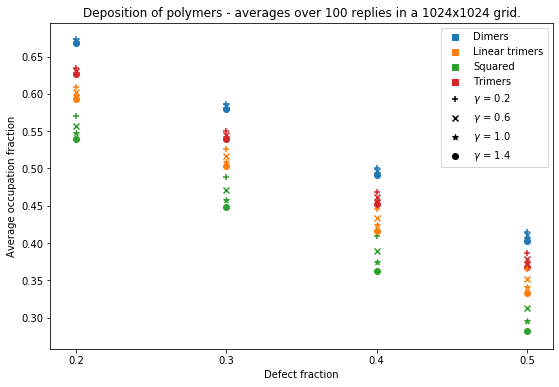

In [3]:
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
marker_list = ['+','x','*','o']
plt.figure( figsize=[9,6] )

gammas = np.unique( [i['gamma'] for i in data] ).tolist()
polys = np.unique( [i['dep_polymers'] for i in data] ).tolist()

for i in data:
    plt.scatter( i['defects_frac'], i['occupation_fraction_average'],
                 c= color_list[ polys.index( i['dep_polymers'] ) ],
                 marker= marker_list[ gammas.index( i['gamma'] ) ], )
plt.xlabel('Defect fraction')
plt.ylabel('Average occupation fraction')
plt.xticks( np.unique( [i['defects_frac'] for i in data] ))

for p in polys:
    plt.scatter( [], [], c= color_list[ polys.index( p ) ], marker= 's', label=p )
for g in gammas:
    plt.scatter( [], [], c= 'black', marker= marker_list[ gammas.index( g ) ], label=r"$\gamma$ = " + str(g) )


plt.legend()
plt.title("Deposition of polymers - averages over 100 replies in a 1024x1024 grid.")
plt.savefig('different_shapes.png')